# General view

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file into pandas dfframe, we saved our preprocessed file at path 'output_file'
output_file = '../data/train_preprocessed.csv'
df = pd.read_csv(output_file)

columns_to_keep = [
    'make',
    'model',
    'manufactured',
    'type_of_vehicle',
    # 'category',
    # 'transmission',
    'power',
    # 'engine_cap',
    'no_of_owners',
    'depreciation',
    'coe',
    'road_tax',
    'dereg_value',
    'mileage',
    'omv',
    'arf',
    'price',
    'reg_year'
]

df = df[columns_to_keep]
num_records, num_attributes = df.shape
print('There are {} df points, each with {} attributes.'. format(num_records, num_attributes))

There are 23946 df points, each with 15 attributes.


In [2]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(target_correlation)

price              1.000000
dereg_value        0.928535
arf                0.902345
omv                0.835252
depreciation       0.816886
power              0.663645
road_tax           0.403141
coe                0.348830
reg_year           0.249966
manufactured       0.231368
type_of_vehicle    0.072368
model             -0.049066
make              -0.060020
no_of_owners      -0.078740
mileage           -0.336031
Name: price, dtype: float64


### omv
-- Handling missing value: since there are only few df points with missing values here, we directly drop those columns.
-- Handling outliers: we apply 3-sigma law here to remove outliers.

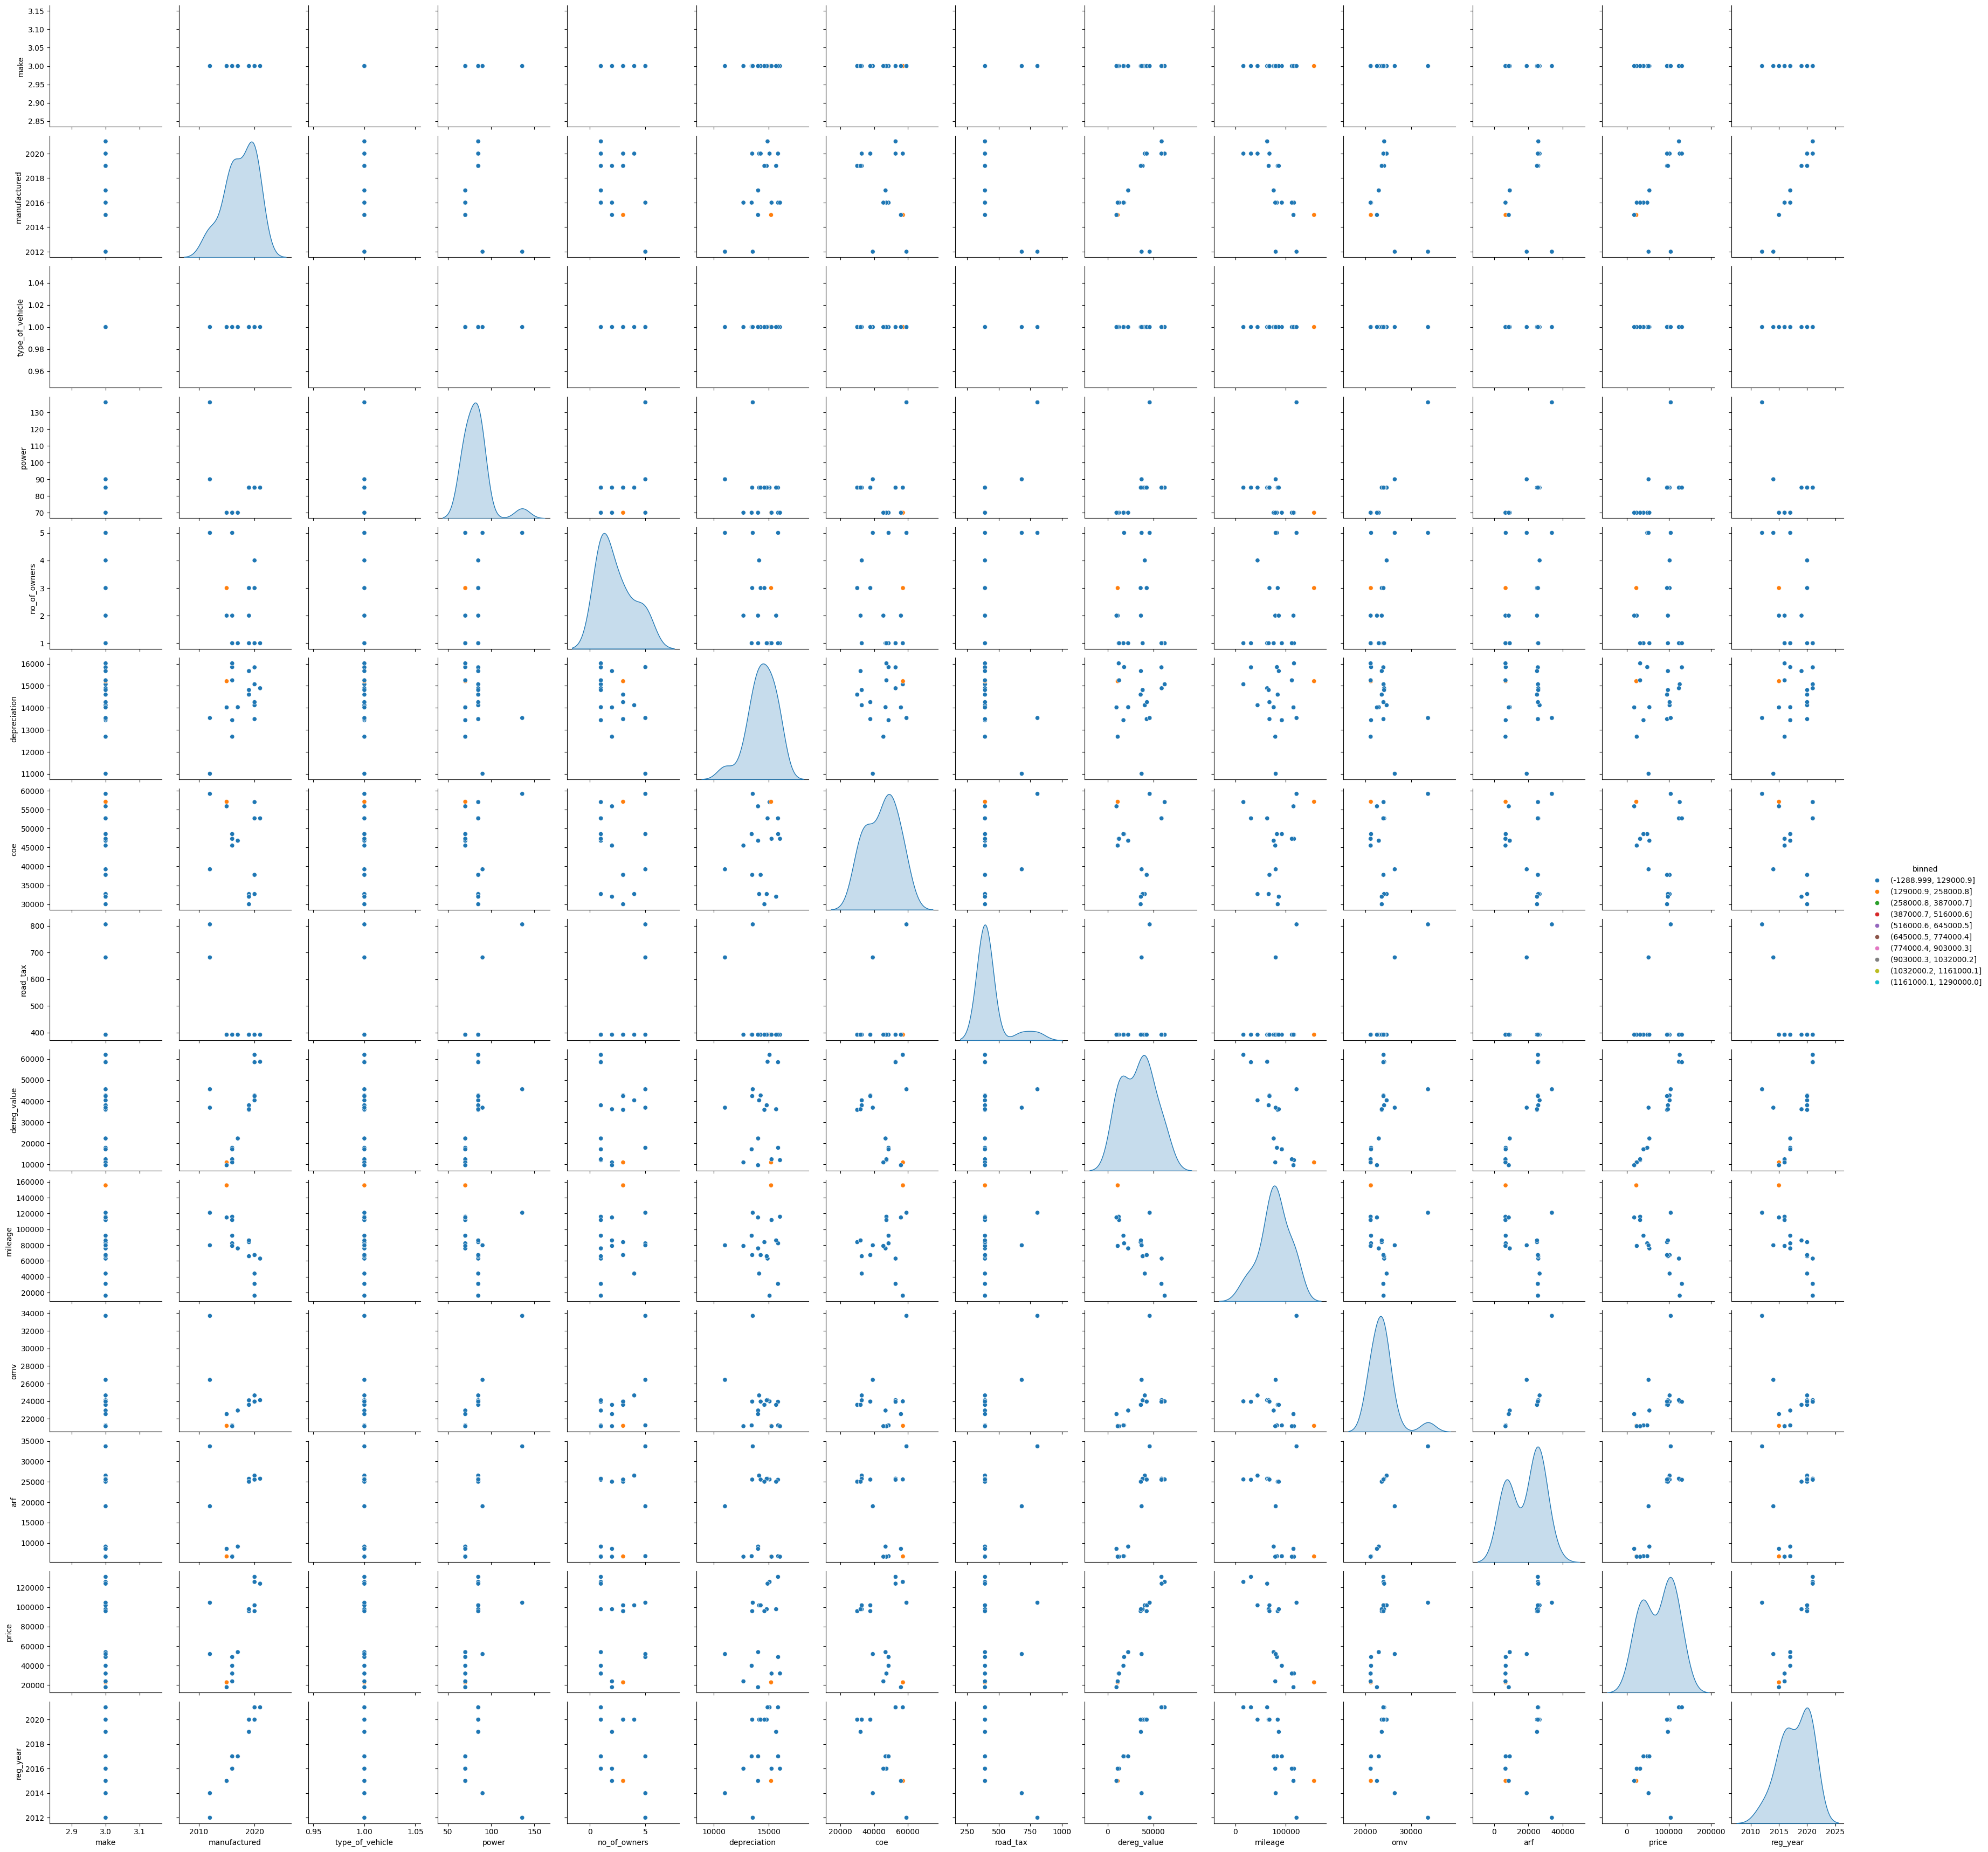

In [3]:
import seaborn as sns
df_model = df[df['model'] == 114]
df_model = df_model.drop(columns=['model'])
df_model['binned'] = pd.cut(df['mileage'], bins=10)
sns.pairplot(df_model, hue='binned')
plt.show()

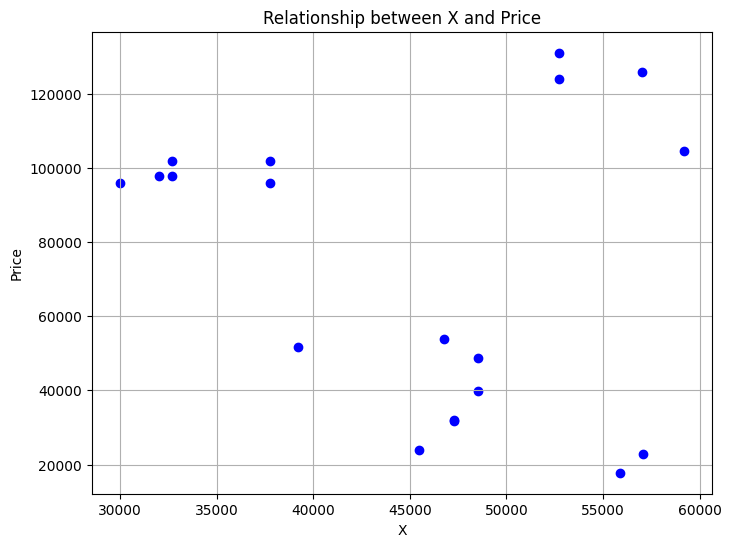

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(df_model['coe'], df_model['price'], color='blue')

plt.title('Relationship between X and Price')
plt.xlabel('X')
plt.ylabel('Price')

plt.grid(True)
plt.show()

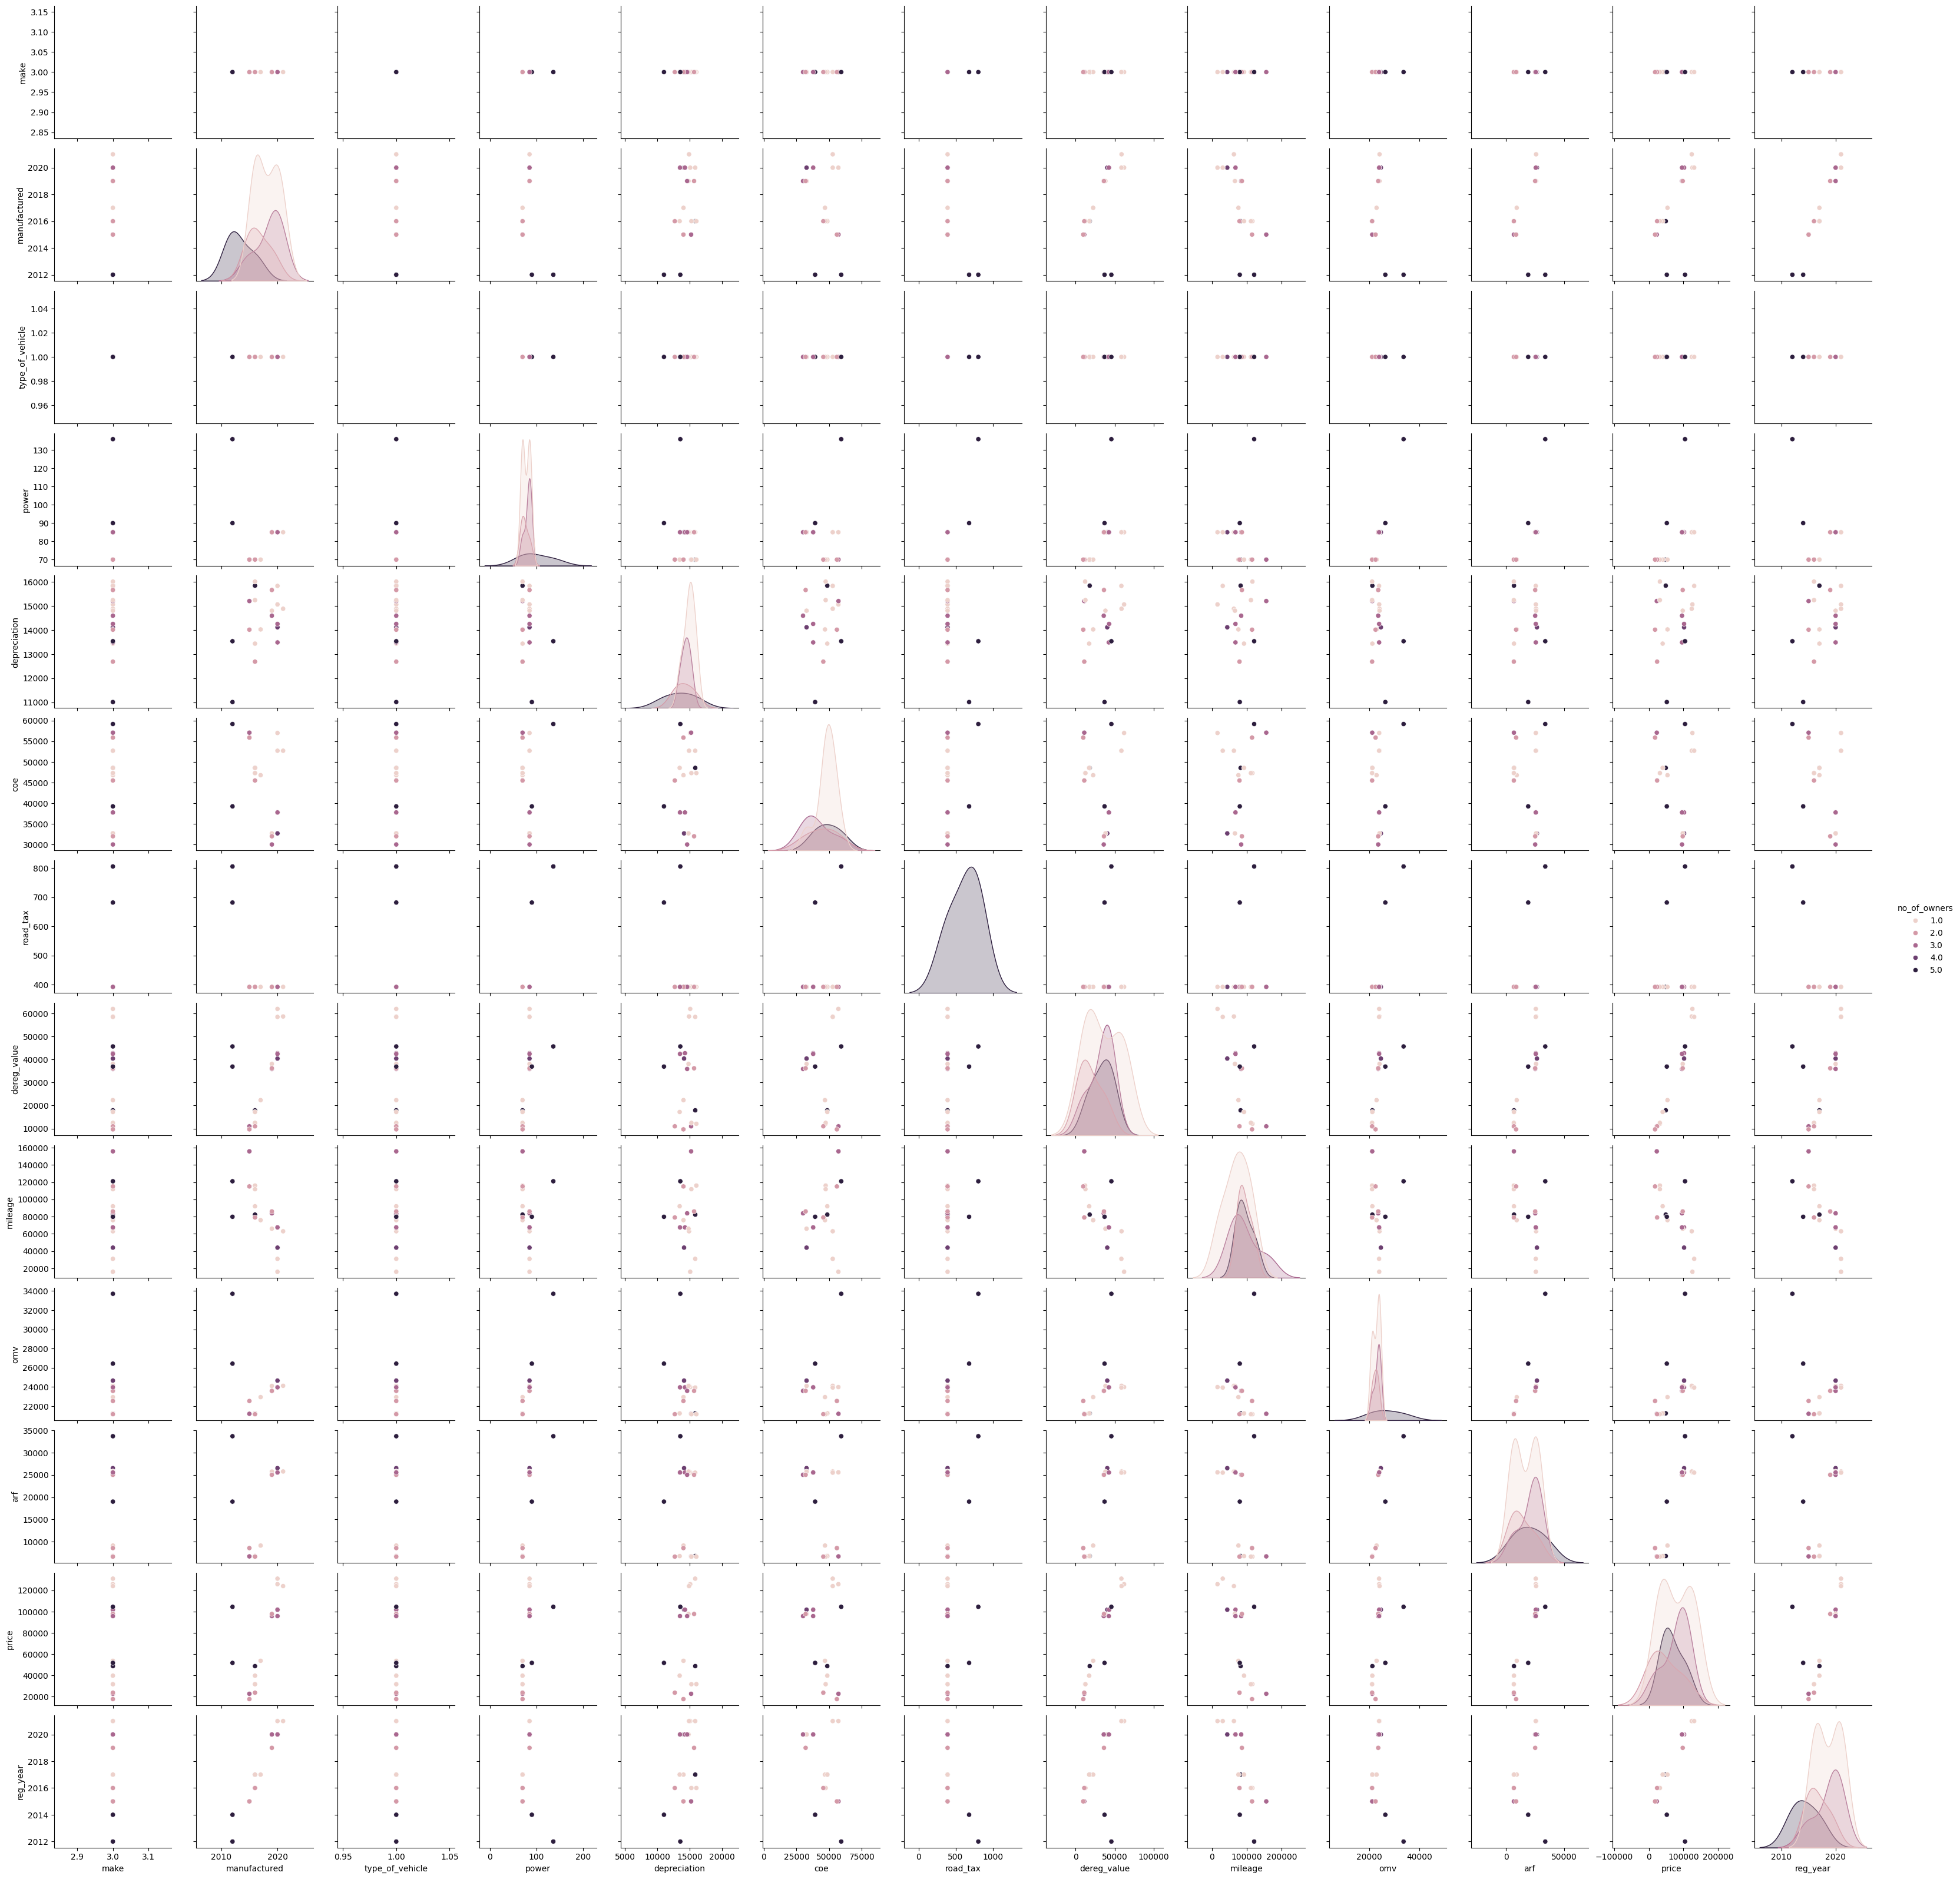

In [5]:
sns.pairplot(df_model, hue='no_of_owners')
plt.show()

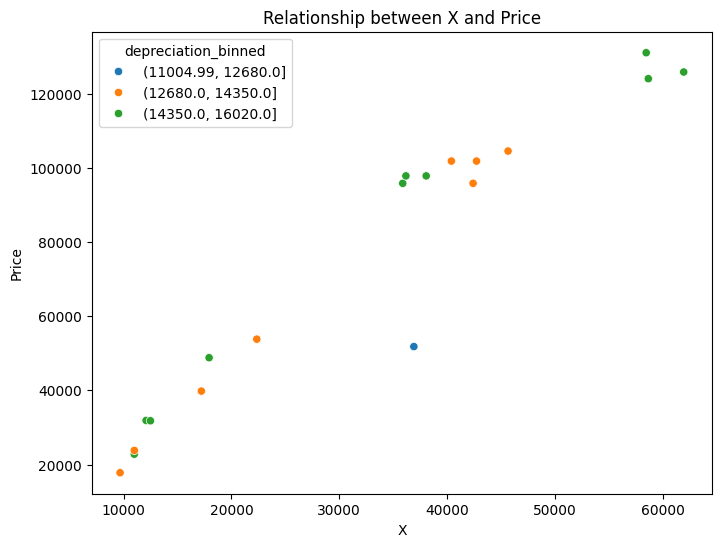

In [6]:
plt.figure(figsize=(8, 6))
df_model['depreciation_binned'] = pd.cut(df_model['depreciation'], bins=3)

sns.scatterplot(data=df_model, x='dereg_value', y='price', hue='depreciation_binned', color='red')
plt.title('Relationship between X and Price')
plt.xlabel('X')
plt.ylabel('Price')

plt.show()

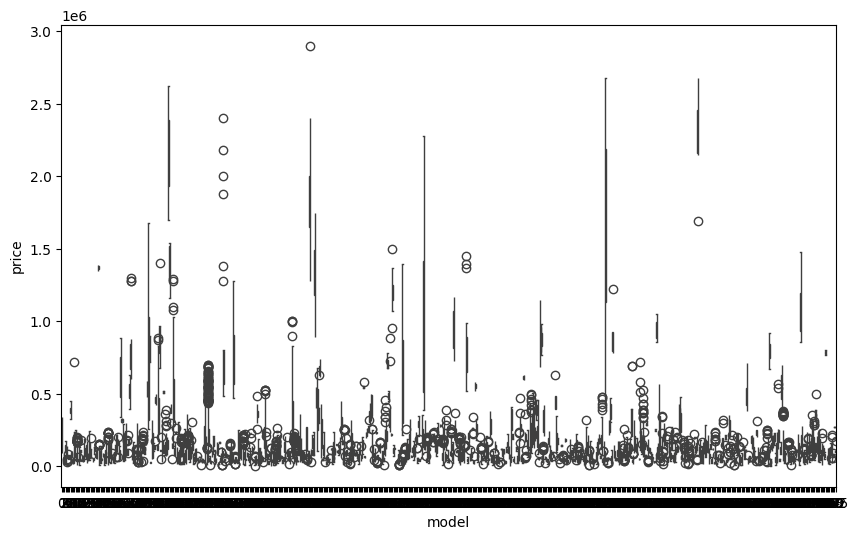

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='model', y='price')

plt.show()


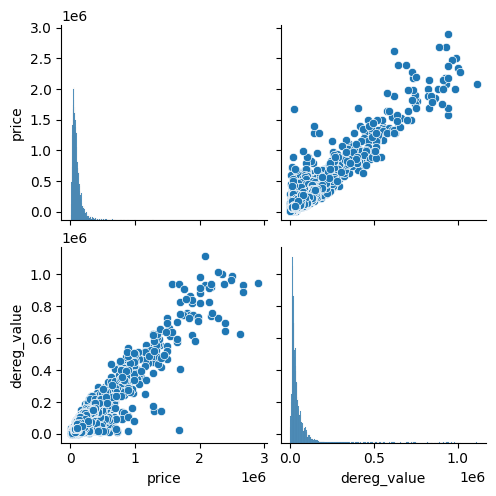

In [8]:
df_small = df[['price', 'dereg_value']]
sns.pairplot(df_small)
plt.show()

In [45]:
# Load file into pandas dfframe, we saved our preprocessed file at path 'output_file'
output_file = '../data/train_preprocessed.csv'
df = pd.read_csv(output_file)

columns_to_keep = [
    'make',
    'model',
    'manufactured',
    'type_of_vehicle',
    'transmission',
    'power',
    'engine_cap',
    'no_of_owners',
    'depreciation',
    'coe',
    'road_tax',
    'dereg_value',
    'mileage',
    'omv',
    'arf',
    'price',
    'reg_year'
]

df = df[columns_to_keep]
num_records, num_attributes = df.shape
print('There are {} df points, each with {} attributes.'. format(num_records, num_attributes))

There are 23946 df points, each with 17 attributes.


model
143    771
705    607
Name: count, dtype: int64


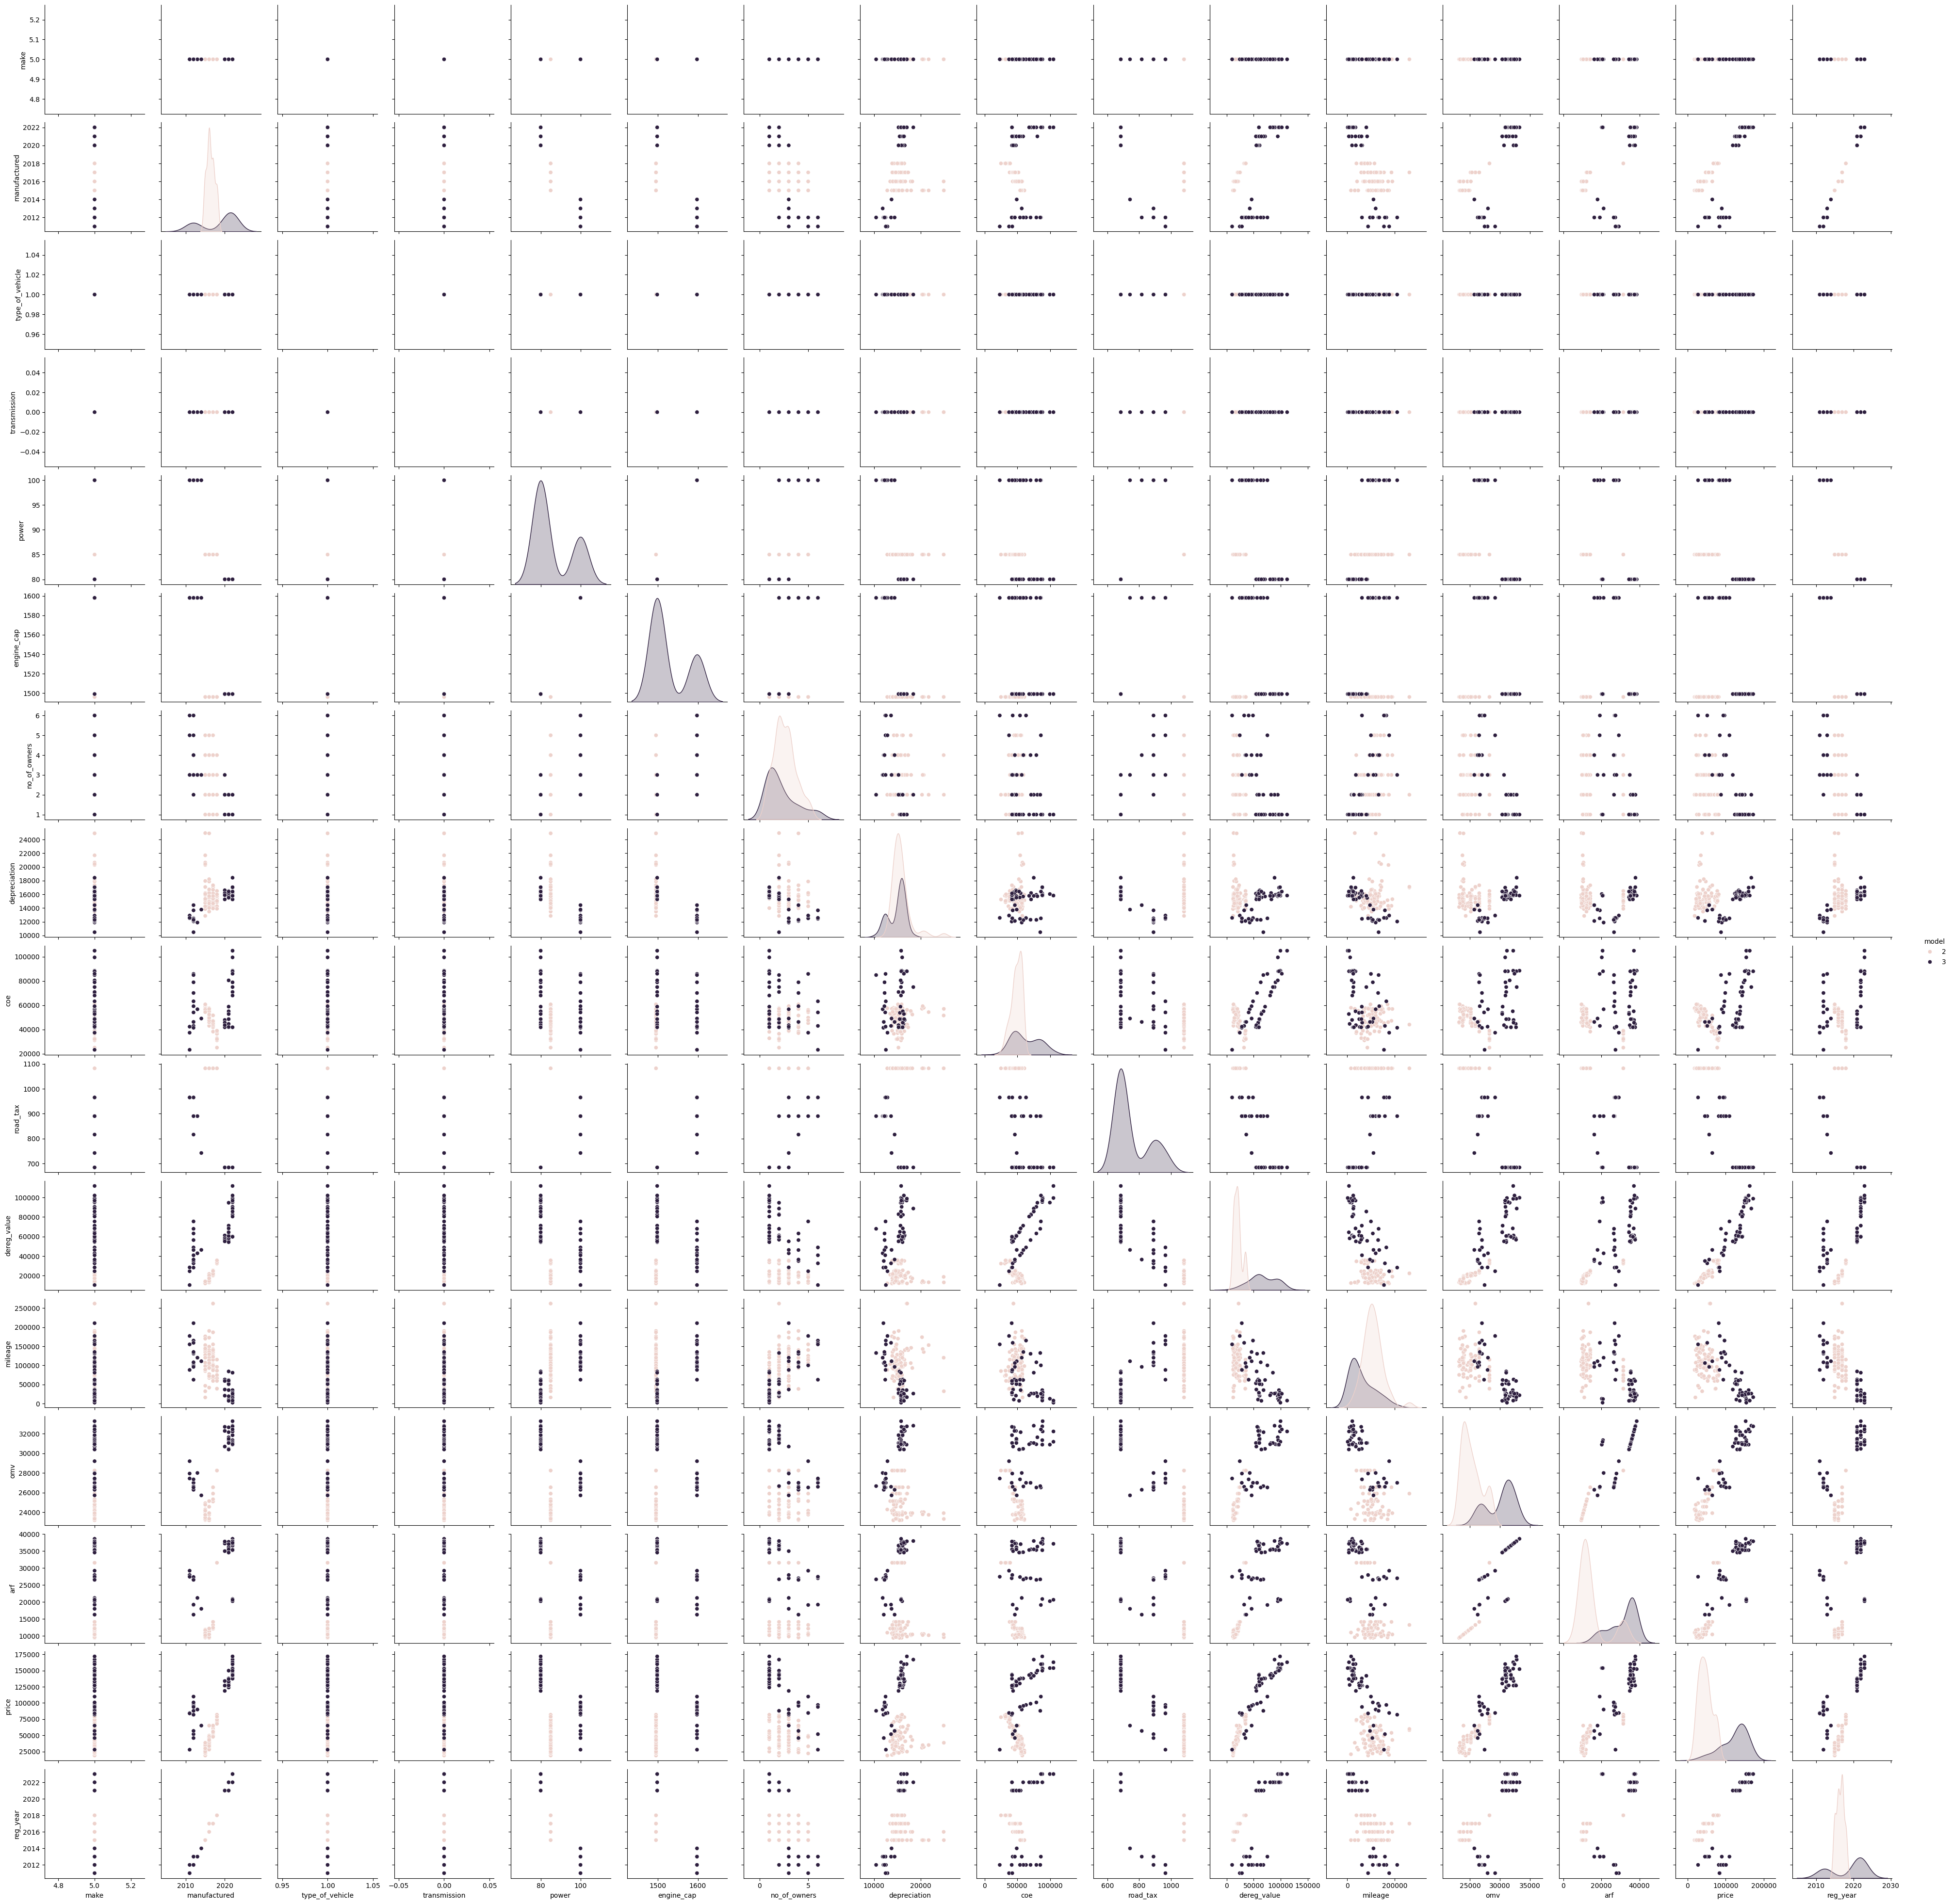

In [46]:
print(df['model'].value_counts().head(2))
df = df[(df['model'] == 2) | (df['model'] == 3)]
sns.pairplot(df, hue='model')
plt.show()

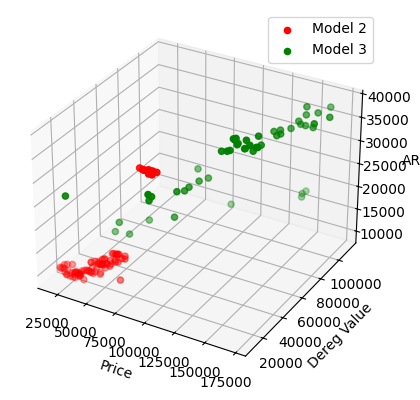

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

models = df['model'].unique()

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for i, model in enumerate(models):
    subset = df[df['model'] == model]
    ax.scatter(subset['price'], subset['dereg_value'], subset['arf'], 
               color=colors[i % len(colors)], label=f'Model {model}')

ax.set_xlabel('Price')
ax.set_ylabel('Dereg Value')
ax.set_zlabel('ARF')

ax.legend()

# 显示图形
plt.show()